## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]


,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

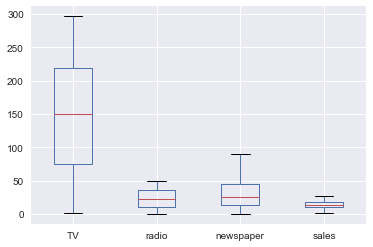

In [3]:
df.boxplot()


### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

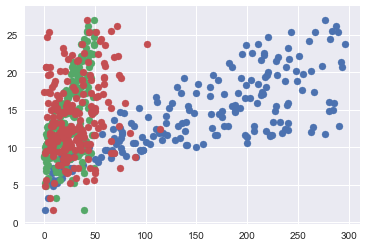

In [4]:
plt.scatter(df[['TV']],df[['sales']])
plt.scatter(df[['radio']],df[['sales']])
plt.scatter(df[['newspaper']],df[['sales']])

C:\Users\Sa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


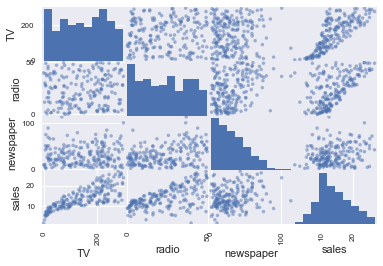

In [5]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df)
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

TV and sales looks like correlated, we can see a positive correlation trend between  TV and sales. In other plots, the points are too scattered to see a clear trend.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
y=df['sales']

b) Set X to be just the features described above in df

In [8]:
X = df.drop(['sales'],1) 

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

d) Train model on training data, and make predictions on testing data

In [10]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
regr.score(X_test, y_test)

0.90955506009040521

$R^2$ nears 0.91 is a good number. It means the model captures 90 percent of the data variance

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

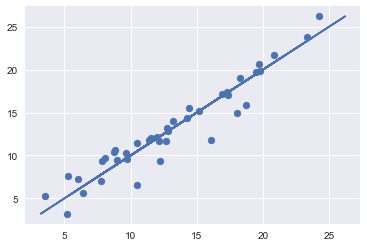

In [12]:
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

It looks like a good model. The predictions are close to the real testing data.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [13]:
regr.coef_

array([ 0.04629706,  0.18884254, -0.00107495])

First,to compare coefficients, we need to standardize the data to have the same scale.

linear regression does not work if there is any interaction or dependence between the features. Therefore, we should check for dependency among features.


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

looks like TV and Radio are positively correlated with sales, and newspaper has a slightly negative correlation with sales. One interpretation is that when we invest more into TV and Radion ads (Radion more than TV), the sales goes up. When invest more in newspaper ads, the sales goes down a little. 
But we should standardize the coefficients first.

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(X)
y1 = scaler.fit_transform(y)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=7)
regr1 = LinearRegression()
regr1.fit(X1_train, y1_train)
print(regr1.coef_)
regr1.score(X1_test, y1_test)

[ 0.76182684  0.53737086 -0.00448702]


C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.90955506009040521

Now we see the TV ads is more positively correlated with sales than radio. and newspaper has almost no influence.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

X['TV*Radio']=X['TV']*X['radio']
X1 = X.drop(['newspaper'],1)

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=7)

regr = LinearRegression()
regr.fit(X1_train, y_train)

print("coefficent" + str(regr.coef_))
print("R^2 = " + str(regr.score(X1_test, y_test)))


coefficent[ 0.01751581  0.02078879  0.00113167]
R^2 = 0.958858207467


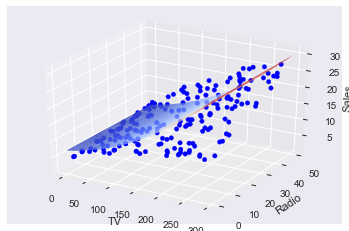

In [18]:
f=lambda t,r: regr.coef_[0] * t + regr.coef_[1] * r + regr.coef_[2] * t * r +regr.intercept_
t = np.linspace(df['TV'].min(),df['TV'].max(), 100)                
r= np.linspace(df['radio'].min(), df['radio'].max(), 100)
T,R = np.meshgrid(t,r)

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

axes.scatter(df['TV'], df['radio'], df['sales'],c='blue',marker='o',alpha=1)

axes.plot_surface(T, R, f(t,r), cmap='coolwarm')

axes.set_xlabel('TV')
axes.set_ylabel('Radio')
axes.set_zlabel('Sales')
plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


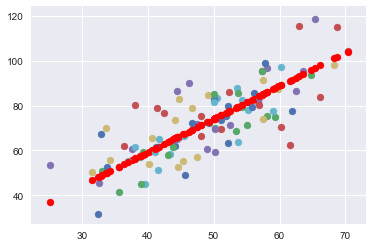

In [19]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}"
    .format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    

run(100,0.0001)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


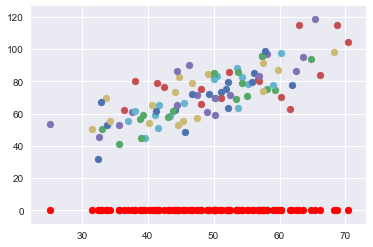

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


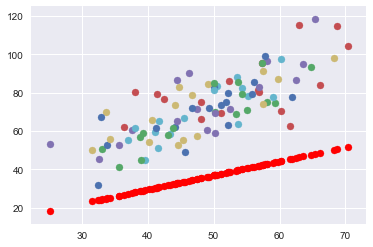

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


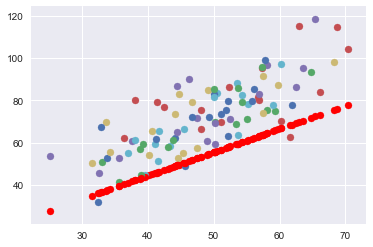

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


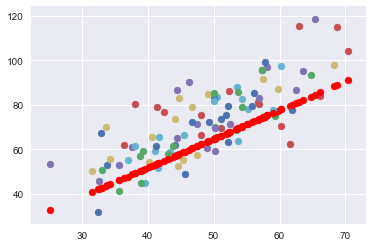

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


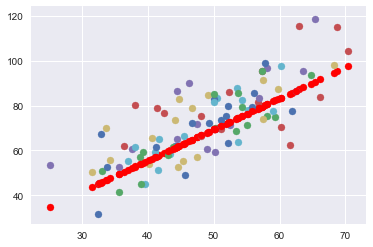

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


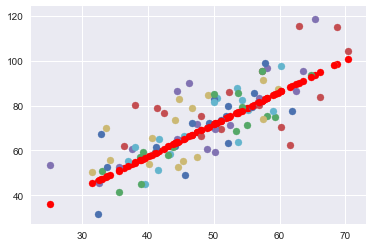

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


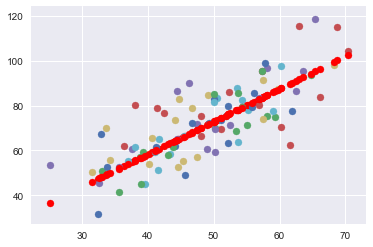

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


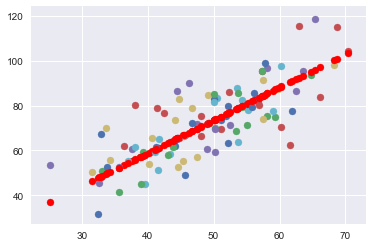

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


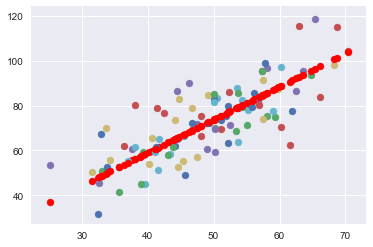

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


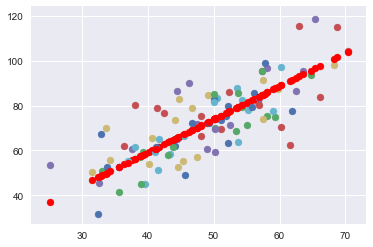

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


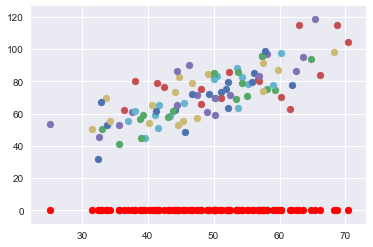

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.07273505055368648, m = 3.685351486795526, error = 12248.923658059466


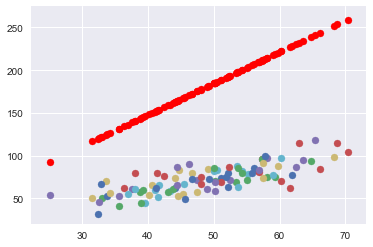

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.03503133043958161, m = -1.812925535576324, error = 27125.9989614646


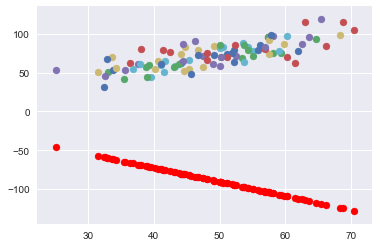

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.12649657885967047, m = 6.390068174869519, error = 60239.92274554496


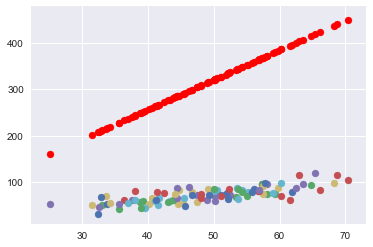

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.11374200683340807, m = -5.848185220212095, error = 133946.07277683076


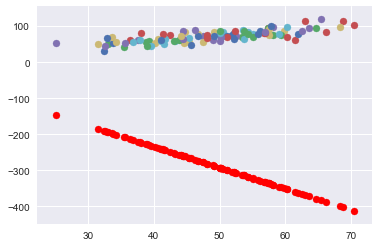

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.24542423466870028, m = 12.410337296692443, error = 298003.84433146904


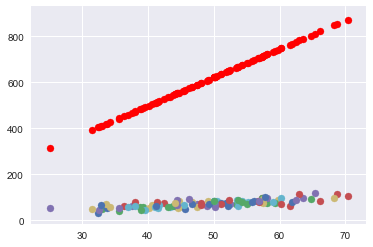

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.28967567003687617, m = -14.829995329449478, error = 663169.4699413386


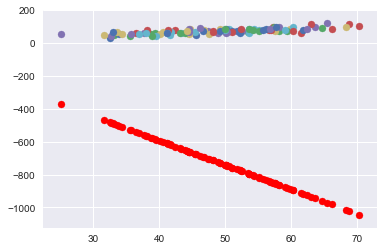

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.5094010313993653, m = 25.81048099761001, error = 1475968.1128761834


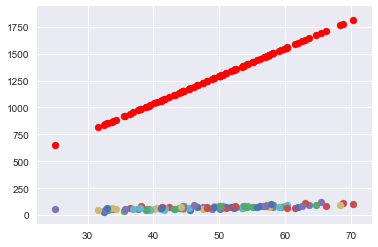

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.6820116610464277, m = -34.822013381765444, error = 3285124.253337868


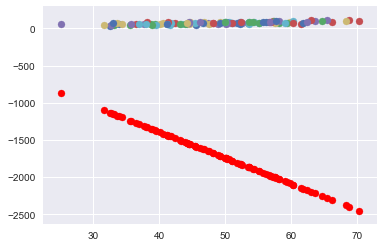

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.096233422691767, m = 55.6370121244165, error = 7312008.363935543


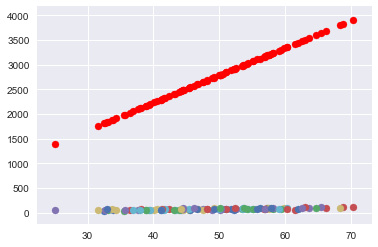

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


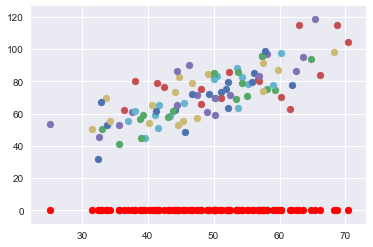

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.14547010110737296, m = 7.370702973591052, error = 86648.7950040084


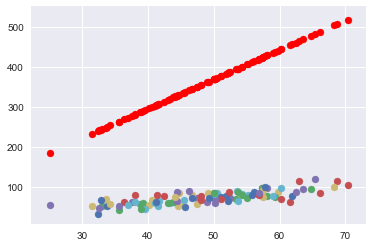

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.4310655239730718, m = -21.99310808948739, error = 1373530.9288716826


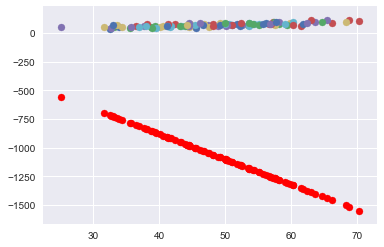

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 1.8687588994744613, m = 94.98776074664512, error = 21797683.773910433


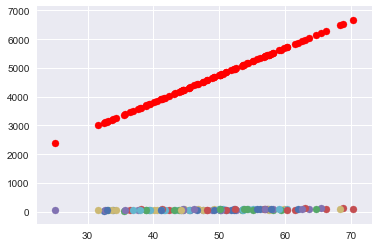

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -7.290394967823431, m = -371.0461698674138, error = 345950151.4758198


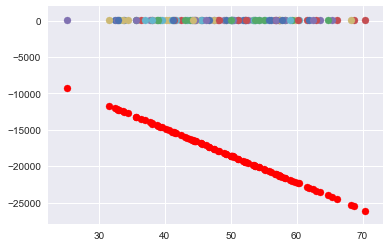

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 29.201266087964783, m = 1485.5616013916942, error = 5490585677.503522


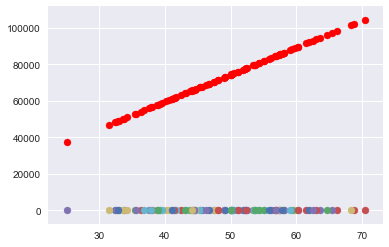

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -116.1729306293348, m = -5910.879572855865, error = 87141281978.78775


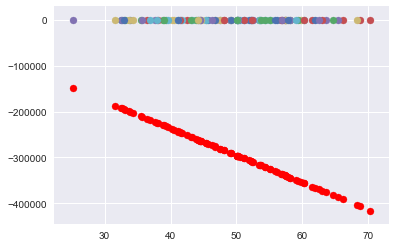

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 462.9786062650985, m = 23555.409616750556, error = 1383022432889.3494


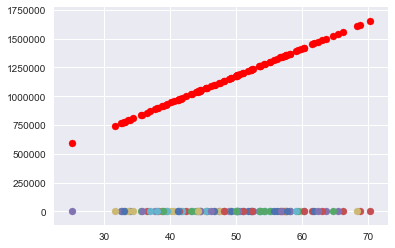

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1844.2694554138704, m = -93833.77530608332, error = 21949998997164.68


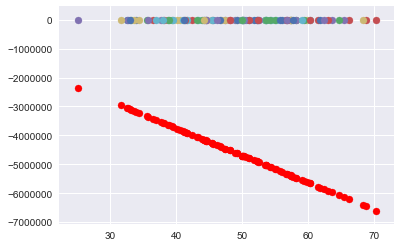

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 7347.456577722989, m = 373826.76516900567, error = 348369227101706.6


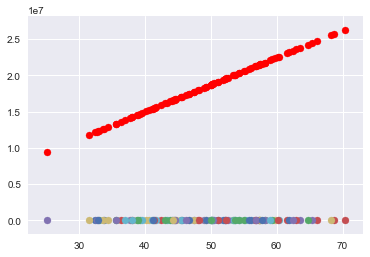

In [ ]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num,0.0001)
    plt.show()
    
for num in range(0,10):
    run(num,0.0005)
    plt.show()
    
for num in range(0,10):
    run(num,0.001)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [ ]:
import numpy
points = genfromtxt("../data/data.csv", delimiter=",")
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
n_range=numpy.arange(0,100)
learning_rates = [0.00001,0.0001,0.0005,0.001]
error = numpy.empty((len(n_range),len(learning_rates)))

for (i, l) in enumerate(learning_rates):
    for n in n_range:
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, l, n)
        error[n,i] =compute_error_for_line_given_points(b, m, points)
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(n_range,error[:,i])
    axes.set_title('learning rate =' + str(l))
    axes.set_xlabel("iteration")
    axes.set_ylabel("$error$")

learning rate is the time step size in gradient descent method

$\beta_{n} = \beta_{n-1} - \kappa \nabla_{\beta} \mathcal{L}(\beta_{n-1})$.

When learning rate is too small, the steps we need is large, and convergence happens slow.

When learning rate is too large, the gradient descent may overshoot the minimum and oscillate back and forth. Therefore we see the solution does not converge.